In [1]:
import pandas as pd
import numpy as np
import find_citation
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/kevingmagana/DSI/capstone/external_data/first_merged_case_law.csv', sep='\t', encoding='utf-8')

In [3]:
data = df.case_text[df.case_text.notnull()]

document = data[1]

In [4]:
print (len(data)), (type(data))

ay= '(1979)'
ay.replace('(', '').replace(')', '')


import re
I = "Cir.2006)"
s = re.search(r"\d+(\.\d+)?", I)
s.group(0)


4527


'2006'

In [4]:
# citations = find_citation()


# print(new_list[0])

def get_citation(citation): 
    """
    :param citation: string, a full citation
    :returns: string, a partial citation to serve as the nodes

    EX: 
        Baker v. McCollan (1979)
        Graham v. Connor (1989)
        Austin v. Hamilton (1991)
    
    """
    cite = []
    for ind, word in enumerate(citation.split(' ')): 
        if ind == 0 or ind == 1 or ind == 2:
            cite.append(word.strip(','))
        try: 
            s = re.search(r"\d+(\.\d+)?", word)
            year= int(s.group(0))            
            if year > 1750 and year <= 2018 and ind > (len(citation.split(' ')))* .80: 
                year= "(", str(year), ")"
                year= "".join(year)
                cite.append(year)
        except: 
            continue
    return " ".join(cite)
    

def get_all_citations(document): 
    """
    :param document: string, legal document with citations
    :returns: list, a list of all citations
    
    """
    citations_objects = find_citation.get_citations(document, html=False)
    citations_strings=[]
    
    for obj in citations_objects:
        citations_strings.append(str(obj))
    
    results=[]
    for citation in citations_strings: 
        results.append(get_citation(citation))
    
    return results

get_all_citations(data[1000])

['States v. Rivera–Ventura',
 'States v. Acevedo',
 'States v. Williams',
 'States v. Ambriz–Ambriz',
 'States v. Angeles–Mascote',
 'Shaughnessy v. United',
 'Zavydas v. Davis',
 'United States v.1903',
 'States v. Williams',
 'States v. Angeles–Mascote',
 'States v. Canals–Jimenez',
 'States v. Zavala–Mendez',
 'Correa v. Thornburgh',
 'States v. Champegnie',
 'Morissette v. United',
 'Liparota v. United',
 "Ass'n v. United",
 'States v. Newton',
 'States v. Rodriguez',
 'States v. Martus',
 'States v. Salazar–Robles',
 'States v. Salazar–Robles',
 'States v. Hernandez–Noriega',
 'States v. Dixon',
 'States v. Quintana–Torres',
 'States v. Ambriz–Ambriz',
 'Arriaga v. Mukasey',
 'Lanzetta v. New',
 'States v. Munoz',
 'States v. Charleus',
 'States v. Gonzalez–Diaz',
 'States v. Ruiz–Lopez']

## Fix United alone and States alone problem -- 


In [5]:
""" 
WARNING -- Takes about a minute to run

"""

all_citations=[]

for document in data:
    all_citations.append(get_all_citations(document))
    
print(len(all_citations))
    


4527


In [6]:
testing = all_citations[1][1] ## the citation 

old = all_citations[1][1].split(' ')[0]
print(testing)

print(testing.replace(old, "United Alaska"))




Alaska v. Aragon
United Alaska v. Aragon


In [7]:

### REPLACE states with United States 

replace_words= {"states"}


def replace_states_with_United_States(list_of_all_citations):
    """
    :param all_citations: list of lists, each list has all the citations per document  
    :returns: list of lists, updated lists: replaced "States" as plaintiff with "United States" 
    
    EX: 
        all_citations= "States v. Brown (2008)" 
        returns = "United States v. Brown (2008)"
    """
    for first, lst in enumerate(list_of_all_citations):
        for second, citation in enumerate(lst): 
            cite = citation.split(' ')[0] 
            if cite.lower() in replace_words: 
                list_of_all_citations[first][second] = citation.replace(cite, "United States")
   
    # Updated Citations
    return list_of_all_citations


## Testing 
for citation in replace_states_with_United_States(all_citations)[2200]: 
    print(citation)


    

United States v. Hochschild
Citizens v. Bredesen
500 F.3d 523


In [8]:
def get_case_titles(court_case): 
    """
    :param court case: STRING, court case document
    :returns: STRING, case title
        EX: 
        'UNITED STATES v. RENDON-ALAMO (2010)' 
    """
    case_title=[]
    for ind, line in enumerate(court_case.splitlines()[0:5]): 
        if ind==1: 
            for word in line.split(' '): 
                if word.isupper() or word=='v.':
                    case_title.append(word.strip(','))
        if ind ==3: 
            year= "(", line[-4:], ")"
            year= "".join(year)
            case_title.append(year)
            
    return " ".join(case_title)
    
    
get_case_titles(data[4000])  

'ALVAREZ-REYNAGA v. H. HOLDER (2010)'

In [9]:
graph_dict = {}

fixed_citations = replace_states_with_United_States(all_citations)

for ind, document in enumerate(data):
    graph_dict[get_case_titles(document)] = fixed_citations[ind] 
    

    
    

In [61]:
count = 0
for key, value in graph_dict.items(): 
    count +=1
    if count > 5: 
        break
    print(key.replace(';','')), print(value)
    
    

PORRO v. BARNES (2010)
['Baker v. McCollan', 'Graham v. Connor', 'Austin v. Hamilton', 'Johnson v. Jones', 'Hudson v. McMillan', 'Ingraham v. Wright', 'Sacramento v. Lewis', 'Roska v. Peterson', 'Edwards v. Johnson', 'Trujillo v. Williams', 'Novitsky v. City', 'Serna v. Colo.', 'Jenkins v. Wood', 'Coleman v. Turpen', 'Dodds v. Richardson', "Monell v. Dep't", 'Barney v. Pulsipher', 'Kentucky v. Graham', 'Lopez v. LeMaster', 'Canton v. Harris', 'Hinton v. City', 'Draper v. Reynolds', 'Jasper v. Thalacker', 'Caldwell v. Moore', 'Michenfelder v. Sumner']
GARCIA-CARBAJAL v. H. HOLDER (2010)
['Sidabutar v. Gonzales', 'Alaska v. Aragon', 'Weinberger v. Salfi', 'Micheli v. Dir.', 'Cruz v. Maurer', 'FCC v. Pottsville', 'Solis-Muela v. I.N.S.']
UNITED STATES v. RENDON-ALAMO (2010)
['United States v. Todd', 'United States v. Morris', 'Stinson v. United', 'Braxton v. United', 'United States v. Ruiz-Gea', 'United States v. Compian-Torres', 'United States v. Moreno-Cisneros', 'United States v. Gomez

## Instantiate a networkx Graph

In [53]:
G = nx.Graph(graph_dict)

print ('# nodes:', G.number_of_nodes())
print ('# edges:', G.number_of_edges())

# nodes: 23564
# edges: 68846


In [11]:
print (nx.shortest_path(G, 'UNITED STATES v. F. ADAME-OROZCO (2010)', 'ILIEV v. H. HOLDER (2010)'))


['UNITED STATES v. F. ADAME-OROZCO (2010)', 'United States v. Ron', 'KWAI FUN WONG; v. V. BEEBE (2013)', 'Russello v. United', 'ILIEV v. H. HOLDER (2010)']


In [14]:
all_paths = list(nx.all_shortest_paths(G, 'UNITED STATES v. F. ADAME-OROZCO (2010)', 'ILIEV v. H. HOLDER (2010)'))
print (len(all_paths))
print (all_paths[-1])

16
['UNITED STATES v. F. ADAME-OROZCO (2010)', 'Rodriguez v. Reno (1999)', 'AGUILERA; v. KIRKPATRICK OIC; INS; U.S. (2001)', 'Reno v. Am.-Arab (1999)', 'ILIEV v. H. HOLDER (2010)']


### Measures of Centrality and Connected Components

In [12]:

degree_dict = G.degree()
# print(degree_dict)
degree_series = pd.Series(degree_dict)
print(degree_series.describe())


count                       23564
unique                      23564
top       (Montana v. Johnson, 3)
freq                            1
dtype: object


In [16]:
Counter(nx.degree_centrality(G)).most_common(10)


[('INS v. Elias-Zacarias (1992)', 0.017652155079055664),
 ('Inc. v. Natural (1984)', 0.017327268789257094),
 ('INS v. St. (2001)', 0.012526171395567108),
 ('Taylor v. United (1990)', 0.010468558226842827),
 ('INS v. Cardoza-Fonseca (1987)', 0.008266551151541405),
 ('INS v. Aguirre-Aguirre (1999)', 0.00797776333838712),
 ('INS v. Ventura (2002)', 0.007616778571944264),
 ('INTERNATIONAL REFUGEE ASSISTANCE PROJECT HIAS v. J. TRUMP F. W. R. U.S. U.S. T.A.; J. A. L. N. O. A L. T. CASA; (2017)',
  0.007183596852212836),
 ('ARAR v. ASHCROFT D. J. J. W. (2009)', 0.006569922749259981),
 ('Shepard v. United (2005)', 0.005811854739729983)]

In [19]:
Counter(nx.eigenvector_centrality(G)).most_common(10)


[('INS v. Elias-Zacarias (1992)', 0.36433756924853716),
 ('Inc. v. Natural (1984)', 0.28905081975879565),
 ('INS v. Cardoza-Fonseca (1987)', 0.188188353026599),
 ('INS v. Aguirre-Aguirre (1999)', 0.15673107961996027),
 ('INS v. St. (2001)', 0.1306897367266931),
 ('INS v. Ventura (2002)', 0.1281449526456495),
 ('INS v. Stevic (1984)', 0.10074666563716587),
 ('Taylor v. United (1990)', 0.08312757966320608),
 ('DIA v. ASHCROFT (2003)', 0.07104716758546635),
 ('Navas v. INS (2000)', 0.06892987565617112)]

In [17]:
nx.number_connected_components(G)


60

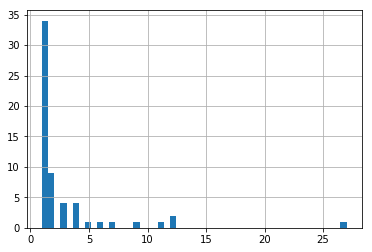

In [18]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = pd.Series([len(cc) for cc in connected_components])
connected_components_sizes.describe()
connected_components_sizes[connected_components_sizes < 1000].hist(bins=50)


## Discovering Communities


### Directed Graphs

In [42]:
import sys
sys.path.append('/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/py_scripts')
# from communities import find_communities_n, find_communities_modularity
from networkx.algorithms.community.centrality import girvan_newman



# d = {key:value for key,value in graph_dict.items()}

n = 2
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.DiGraph(first_few_pairs)
print ('# nodes:', G.number_of_nodes())
print ('# edges:', G.number_of_edges())

communities = girvan_newman(G)


# print (len(communities))
# print (communities)
# for i in communities:
#     print(i)
#     break

sort = tuple(sorted(c) for c in next(communities))

print(len(sort))
print(sort)

# nodes: 34
# edges: 32
3
(['Austin v. Hamilton', 'Barney v. Pulsipher', 'Caldwell v. Moore', 'Canton v. Harris', 'Coleman v. Turpen', 'Dodds v. Richardson', 'Draper v. Reynolds', 'Edwards v. Johnson', 'Graham v. Connor', 'Hinton v. City', 'Hudson v. McMillan', 'Ingraham v. Wright', 'Jasper v. Thalacker', 'Jenkins v. Wood', 'Johnson v. Jones', 'Kentucky v. Graham', 'Lopez v. LeMaster', 'Michenfelder v. Sumner', "Monell v. Dep't", 'Novitsky v. City', 'PORRO v. BARNES; (2010)', 'Roska v. Peterson', 'Sacramento v. Lewis', 'Serna v. Colo.', 'Trujillo v. Williams'], ['Alaska v. Aragon', 'Cruz v. Maurer', 'FCC v. Pottsville', 'GARCIA-CARBAJAL v. H. HOLDER (2010)', 'Micheli v. Dir.', 'Sidabutar v. Gonzales', 'Solis-Muela v. I.N.S.', 'Weinberger v. Salfi'], ['Baker v. McCollan'])


In [57]:
pwd

'/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/notebooks'

In [43]:
graph_pos = nx.spring_layout(G)
# print(graph_pos)
# plt.show()

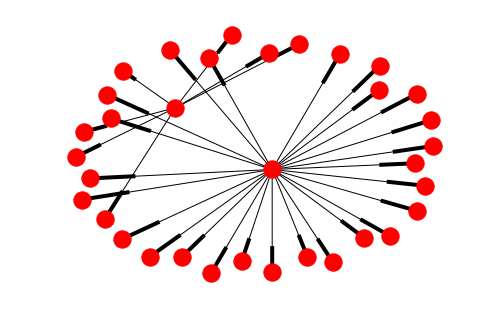

In [44]:
nx.draw(G)
# nx.draw_random(G)
# nx.draw_circular(G)
# nx.draw_spectral(G)

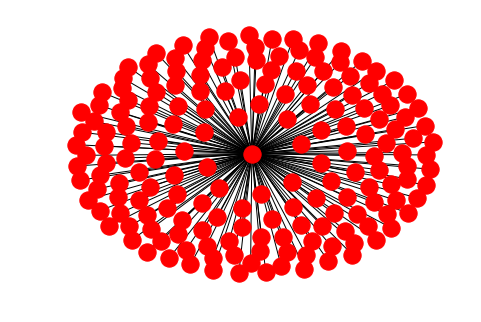

In [17]:
search_result = 'ARAR v. ASHCROFT D. J. J. W. (2009)'

G = nx.DiGraph(graph_dict)

# print ('# nodes:', G.number_of_nodes())
# print ('# edges:', G.number_of_edges())

search_query = {k: graph_dict[k] for k in list(graph_dict) if k == search_result}

g = nx.DiGraph(search_query)

community = girvan_newman(G)




# if search_result in graph_dict: 
#     print(G[search_result])

nx.draw(g)


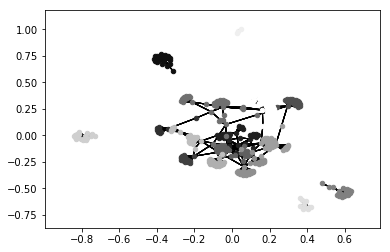

In [45]:
#other example to display a graph with its community :
#better with karate_graph() as defined in networkx examples
#erdos renyi don't have true community structure

import community 

n = 25
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)

# G = nx.erdos_renyi_graph(30, 0.05)

# print(G)
#first compute the best partition

partition = community.best_partition(G)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    nx.draw_networkx_edges(G, pos, alpha=0.5)


plt.show()

In [24]:
### Dendogram -- what's it for?? Hiearchical Clustering... but, for what? 
dendo = community.generate_dendrogram(G)
for level in range(len(dendo) - 1):
    print("partition at level", level, "is", partition_at_level(dendo, level))

In [38]:
## Produce the graph where nodes are the communities 
# g = G

n=5
g = nx.complete_graph(2*n)

part = dict([])
for node in g.nodes() :
    try: 
        part[node] = node % 2
    except: 
        continue

ind = community.induced_graph(part, g)
goal = nx.Graph()
goal.add_weighted_edges_from([(0,1,n*n),(0,0,n*(n-1)/2), (1, 1, n*(n-1)/2)])

print(goal)
# nx.is_isomorphic(int, goal)

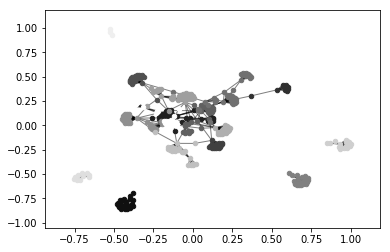

In [20]:

# Compute Modularity 
part = community.best_partition(G)
community.modularity(part, G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [28]:
# G.nodes()
print (nx.info(G))


Name: 
Type: Graph
Number of nodes: 407
Number of edges: 444
Average degree:   2.1818


In [22]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

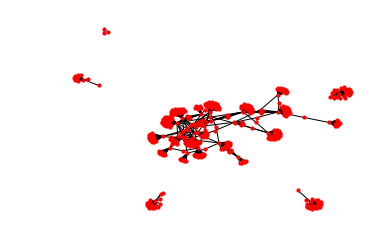

In [23]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 10)

## Community Detection

In [24]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

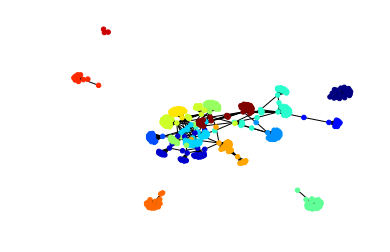

In [25]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 20, with_labels = False)

## Parallel Betweeness Centrality

In [114]:
from multiprocessing import Pool
import itertools


In [115]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [116]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [117]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [126]:
# bt = between_parallel(G)
# top = 10

# max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
# bt_values = [5]*len(G.nodes())
# bt_colors = [0]*len(G.nodes())

# print(bt_values)
# print(bt_colors)

# for ind, max_key, max_val in enumerate(max_nodes[0:3]):
# #     print (max_key), print(max_val)
# #     print(max_nodes[ind])
# #     bt_values[max_nodes[max_key]] = 150
# #     bt_colors[max_key] = 2
#     pass
    

# plt.axis("off")
# nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

## Additional Community Detection

In [36]:
n = 10
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}

G = nx.Graph(first_few_pairs)

communities = girvan_newman(G)
print(type(next(communities)))
print(type(communities))
sort = tuple(sorted(c) for c in next(communities))

print(len(sort))
print(sort)

<class 'tuple'>
<class 'generator'>
8
(['Austin v. Hamilton', 'Baker v. McCollan', 'Barney v. Pulsipher', 'Caldwell v. Moore', 'Canton v. Harris', 'Coleman v. Turpen', 'Dodds v. Richardson', 'Draper v. Reynolds', 'Edwards v. Johnson', 'Graham v. Connor', 'Hinton v. City', 'Hudson v. McMillan', 'Ingraham v. Wright', 'Jasper v. Thalacker', 'Jenkins v. Wood', 'Johnson v. Jones', 'Kentucky v. Graham', 'Lopez v. LeMaster', 'Michenfelder v. Sumner', "Monell v. Dep't", 'Novitsky v. City', 'PORRO v. BARNES; (2010)', 'Roska v. Peterson', 'Sacramento v. Lewis', 'Serna v. Colo.', 'Trujillo v. Williams'], ['Alaska v. Aragon', 'Cruz v. Maurer', 'FCC v. Pottsville', 'GARCIA-CARBAJAL v. H. HOLDER (2010)', 'Micheli v. Dir.', 'Sidabutar v. Gonzales', 'Solis-Muela v. I.N.S.', 'Weinberger v. Salfi'], ['Braxton v. United', 'Stinson v. United', 'UNITED STATES v. RENDON-ALAMO (2010)', 'United States v. Compian-Torres', 'United States v. Dozier', 'United States v. Gomez-Leon', 'United States v. Leiva-Deras',

In [31]:
G.edges(['PORRO v. BARNES; (2010)'])

EdgeDataView([('PORRO v. BARNES; (2010)', 'Baker v. McCollan'), ('PORRO v. BARNES; (2010)', 'Graham v. Connor'), ('PORRO v. BARNES; (2010)', 'Austin v. Hamilton'), ('PORRO v. BARNES; (2010)', 'Johnson v. Jones'), ('PORRO v. BARNES; (2010)', 'Hudson v. McMillan'), ('PORRO v. BARNES; (2010)', 'Ingraham v. Wright'), ('PORRO v. BARNES; (2010)', 'Sacramento v. Lewis'), ('PORRO v. BARNES; (2010)', 'Roska v. Peterson'), ('PORRO v. BARNES; (2010)', 'Edwards v. Johnson'), ('PORRO v. BARNES; (2010)', 'Trujillo v. Williams'), ('PORRO v. BARNES; (2010)', 'Novitsky v. City'), ('PORRO v. BARNES; (2010)', 'Serna v. Colo.'), ('PORRO v. BARNES; (2010)', 'Jenkins v. Wood'), ('PORRO v. BARNES; (2010)', 'Coleman v. Turpen'), ('PORRO v. BARNES; (2010)', 'Dodds v. Richardson'), ('PORRO v. BARNES; (2010)', "Monell v. Dep't"), ('PORRO v. BARNES; (2010)', 'Barney v. Pulsipher'), ('PORRO v. BARNES; (2010)', 'Kentucky v. Graham'), ('PORRO v. BARNES; (2010)', 'Lopez v. LeMaster'), ('PORRO v. BARNES; (2010)', 'Can

## Undirected Graph 

In [232]:
n = 15

# G = nx.Graph(graph_dict)

first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}

# k = (list(graph_dict)[0])
# print(graph_dict[k])
# print(first_few_pairs)
g = nx.Graph()


def get_weights(list_a, list_b ):
    """
    :param list_a: string, first node
    :param list_b: string, next node
    :returns: int, weights
    
    """
    return len(set(list_a) & set(list_b))
     

for ind, (key, value) in enumerate(first_few_pairs.items()): 
    g.add_node(key)
    list_a = first_few_pairs[key]

    for inx, (other_nodes, other_values) in enumerate(first_few_pairs.items(), ind + 1): 
        list_b = first_few_pairs[other_nodes]   
        if list_a == list_b:
            continue
        else:  
            weight = get_weights(list_a, list_b)
#             print(len([key,other_nodes, weight]))
            g.add_edge(key, other_nodes, weight = weight)
            #get_weights(list_a, list_b)
#             print(len(set(list_a) & set(list_b)))
    

# print(g.get_vertices())
# print(g.vert_dict)


# G = nx.DiGraph(graph_dict)



# for v in g:
#     for w in v.get_connections():
#         vid = v.get_id()
#         wid = w.get_id()
#         print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))



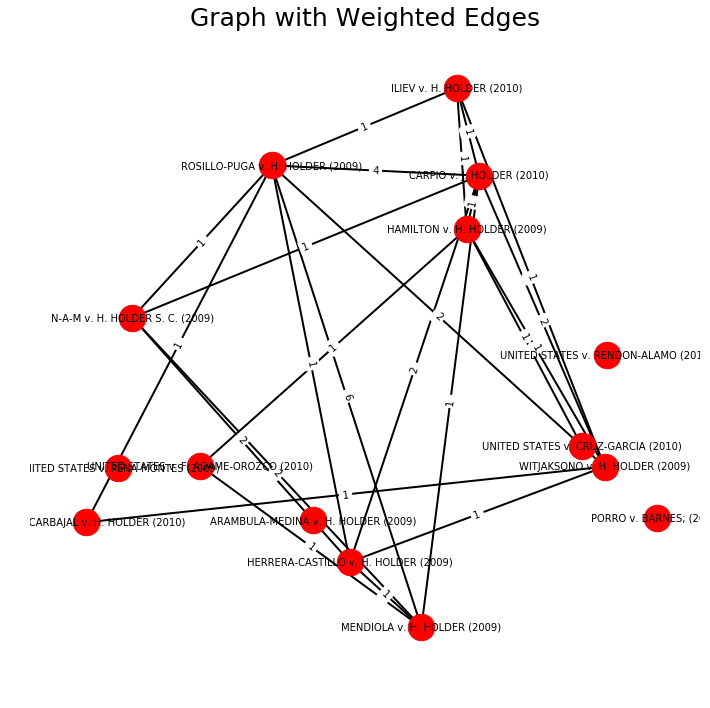

In [242]:
elarge=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] >0.5]
# esmall=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] <=0.5]

# pos=nx.spring_layout(g) # positions for all nodes
pos=nx.random_layout(g) # positions for all nodes


plt.figure(3,figsize=(12,12)) 
# nodes
nx.draw_networkx_nodes(g,pos,node_size=700)

# edges
nx.draw_networkx_edges(g,pos,edgelist=elarge,width=2)

# nx.draw_networkx_edges(g,pos,edgelist=esmall,
#                     width=4,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')

## Label Edge Weights and remove zeros from weights 
edge_labels = nx.get_edge_attributes(g,'weight')
for key, value in edge_labels.items(): 
    if value == 0: 
        edge_labels[key] = ''

nx.draw_networkx_edge_labels(g, pos, edge_labels)
 

# Axes settings (make the spines invisible, remove all ticks and set title)
# ax = plt.gca()
# [sp.set_visible(False) for sp in ax.spines.values()]
# ax.set_xticks([])
# ax.set_yticks([])


plt.title('Graph with Weighted Edges', fontsize=25)
plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

good_enough
if 

## get Adjacent List

In [103]:
# for v in g:
#     print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))

In [68]:
"""
Code originally from: http://www.bogotobogo.com/python/python_graph_data_structures.php 

"""
class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}

    def __str__(self):
        return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)

        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()
    
    def get_edges(self): 
        return self.vert_dict.values()

In [81]:
list_a = first_few_pairs['UNITED STATES v. PENA-MONTES (2009)']
list_b = first_few_pairs['PORRO v. BARNES; (2010)']
set(list_a) & set(list_b)

set()